In [1]:
# support vectors machines are one of the most popular models in machine learning
# C can be seen as 1 / lambda. Decreasing C increases the amount of regularization

In [45]:
# Adding standard libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris()

In [6]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
np.unique(iris['target'])

array([0, 1, 2])

In [12]:
X = iris['data'][:, [2, 3]]

In [22]:
y = (iris['target'] == 2).astype(np.float64)

In [30]:
svm_clf = Pipeline(
    [('scaler', StandardScaler()),
     ('linear_svc', LinearSVC(C = 1, loss = 'hinge', verbose=True))
    ], verbose = True
)

In [31]:
svm_clf.fit(X, y)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[LibLinear][Pipeline] ........ (step 2 of 2) Processing linear_svc, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=True))],
         verbose=True)

In [35]:
svm_clf.predict([[5.5, 1.7]])

array([1])

[Pipeline] ..... (step 1 of 3) Processing poly_features, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing svm_clf, total=   0.0s


/home/sergio/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


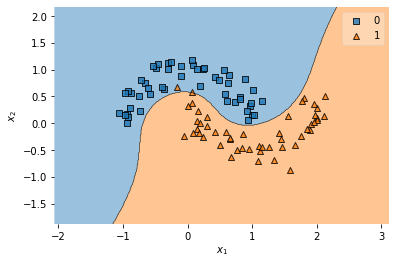

In [55]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss = 'hinge'))
], verbose = True)

polynomial_svm_clf.fit(X, y)

plot_decision_regions(X, y, polynomial_svm_clf, legend=1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [40]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
], verbose = True)

rbf_kernel_svm_clf.fit(X, y)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=True)

In [41]:
from mlxtend.plotting import plot_decision_regions

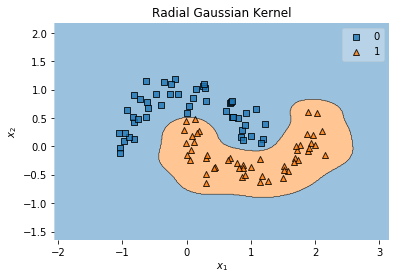

In [49]:
plot_decision_regions(X, y, rbf_kernel_svm_clf, legend = 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Radial Gaussian Kernel')
plt.show()

In [56]:
# LinearSVC time complexityO(m*n)
# SGDClassifier time complexity(m*n)
# SVC (m^2 * n) to o(m^3 * n)

In [62]:
svm_clf.decision_function([[2.3, 1.5]])

array([-2.91363797])

In [66]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

# 1) What is the fundamental idea behind Support Vector Machines?
The fundamental idea of support vector machines is to find the decision boundary that has the largest margin possible. The reason being that if a dataset is linearly separable then there are possible many lines that could be fitted to produce a suitable boundary even though the fit many not have a good generalization. By fitting a linear decision boundary with the largest margin possible we could have a model with better generalization error

# 2) What is a support vector?


# 3) Why is it important to scale the inputs when using SVMs?

# 4) Can an SVM classifier output a confidence score when it classifies a instance? what about a probability?

# 5) Should you use the primal or the dual form of the SVM problem to train a model with on a training set with millions of instances and hundred of features

# 6) Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or descrease gamma? What about C?

C can be seen as inversely related to lambda, descreasing C increases lambda. We should then increase C in order to decrease the regularizing term. gamma is similar to C, increase it for an underfitting model